# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2023.10.10.1.CT

## Background
(From https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions)
### 2023 Data Scientists Jobs Descriptions
This dataset was obtained from the Google Jobs API through serpAPI and contains information about job offers for data scientists in companies based in the United States of America (USA). The data may include details such as job title, company name, location, job description, salary range, and other relevant information. The dataset is likely to be valuable for individuals seeking to understand the job market for data scientists in the USA and for companies looking to recruit data scientists. It may also be useful for researchers who are interested in exploring trends and patterns in the job market for data scientists. The data should be used with caution, as the API source may not cover all job offers in the USA and the information provided by the companies may not always be accurate or up-to-date.

The goal of this homework assignment is to investigate those job descriptions.

The data file is available via https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions/download?datasetVersionNumber=1.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

Please fill in your uniqname in the next code cell:

In [118]:
MY_UNIQNAME = "sudhagar"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Important Note
**You are not permitted to use additional packages beyond those that are already imported in the cell above, although you are welcome to import subpackages from the packages listed in the previous cell (e.g., `from spacy.lang.en.stop_words import STOP_WORDS` is fine, whereas `import fuzzywuzzy` or `from hyphenate import hyphenate_word` are not).**

In [2]:
# Read the CSV file
file_path = "C:/Users/hp/Downloads/UMich Fall Sem 23-24/SI 618/SI 618 HW 5/Jobs.csv"
jobs = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
print(jobs.head(5))

   Unnamed: 0                                       title  \
0           0  Senior Analyst, Data Science and Analytics   
1           1                       Senior Data Scientist   
2           2                   Lead Data Science Analyst   
3           3                         Data Science Intern   
4           4                              Data Scientist   

                             company  announcement  \
0                         TransUnion      The Muse   
1             Grubhub Holdings, Inc.  ZipRecruiter   
2        Discover Financial Services      LinkedIn   
3                      AbelsonTaylor  Startup Jobs   
4  NORC at the University of Chicago   SimplyHired   

                                         description  
0  TransUnion's Job Applicant Privacy Notice  Wha...  
1  About The Opportunity  We're all about connect...  
2  Discover. A brighter future.  With us, you’ll ...  
3  Are you a 2023 college graduate or rising coll...  
4  JOB DESCRIPTION:  At NORC, Dat

## 1. What percentage of jobs include the phrase "data scientist" or "data science" in their title?  
Note that you will need to make (good) decisions about normalizing (i.e. converting to lowercase), how to handle "close" matches, etc. 
#

In [3]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Delete the 'Unnamed: 0' column
del jobs["Unnamed: 0"]

# Normalize the 'title' column by converting it to lowercase
jobs['title'] = jobs['title'].str.lower()

# Find all rows where the 'title' column contains 'data scientist' or 'data science'
data_science_jobs = jobs[jobs['title'].str.contains('data scientist|data science')]

# Calculate the percentage
percentage = (len(data_science_jobs) / len(jobs)) * 100

# Print the result
print(f"The percentage of jobs that include 'data scientist' or 'data science' in their title is {percentage} %")

The percentage of jobs that include 'data scientist' or 'data science' in their title is 41.392405063291136 %


### <span style="color:red"> Question 1 Interpretation - </span>
* Out of all the jobs in the given dataset, approximately 41.39% of them have titles that contain either "data scientist" or "data science." This percentage gives us an idea of how prevalent these specific terms are in the job titles within the dataset. It suggests that a significant portion of the jobs are related to the field of data science or require data science skills.

### 2. Create a visualization that shows the distribution of words counts of the descriptions. Omit stopwords. Describe what the visualization shows you. (Hint: a histogram is a good choice here.)

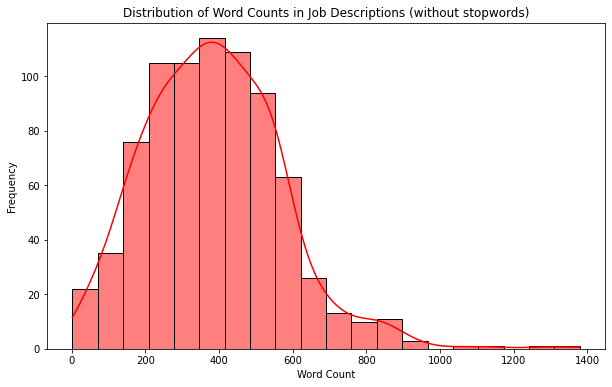

In [4]:
# Tokenize the 'description' column and remove stopwords
stop_words = set(stopwords.words('english'))

# Apply tokenization and stopword removal
jobs['description_no_stopwords'] = jobs['description'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

# Calculate word counts
jobs['word_count'] = jobs['description_no_stopwords'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(jobs['word_count'], bins=20, kde=True, color='red')
plt.title('Distribution of Word Counts in Job Descriptions (without stopwords)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### <span style="color:red"> Question 2 Interpretation - </span>
* According to the histogram created above (after omitting the stopwords), the frequency of job descriptions with close to 400 words is the highest and the frequncy of JDs with more than 1000 words is very low.
* This shows that the employers/companies do not tend to give very lengthy JDs instead they choose to keep it precise and to the point.

### 3. Based on the descriptions, create a bar chart showing the top 10 tools used by data scientists.
Here is a list of tools to consider: Python, R, SQL, Jupyter, NumPy, Pandas, Matplotlib, Seaborn, SciPy, Scikit-Learn, TensorFlow, PyTorch, Keras, XGBoost, Plotly, Dask, Spark, Hadoop, AWS, Google Cloud, Azure, IBM Watson, NLTK, OpenCV, Gensim, StatsModels, Theano, Caffe, Bokeh, Folium, ggplot, Geopandas, Yellowbrick, Flask, Dash, Streamlit, FastAPI, PySpark, TensorBoard, NetworkX, BeautifulSoup, Scrapy, Numba, Cython, Git

Provide an interpretation of your bar chart -- what does it tell you?


In [134]:
# List of tools
tools = ['python', 'r', 'sql', 'jupyter', 'numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'scikit-learn', 'tensorflow', 'pytorch',
         'keras', 'xgboost', 'plotly', 'dask', 'spark', 'hadoop', 'aws', 'google cloud', 'azure', 'ibm watson', 'nltk', 'opencv', 
         'gensim', 'statsmodels', 'theano', 'caffe', 'bokeh', 'folium', 'ggplot', 'geopandas', 'yellowbrick', 'flask', 'dash', 'streamlit',
         'fastapi', 'pyspark', 'tensorboard', 'networkx', 'beautifulsoup', 'scrapy', 'numba', 'cython', 'git']


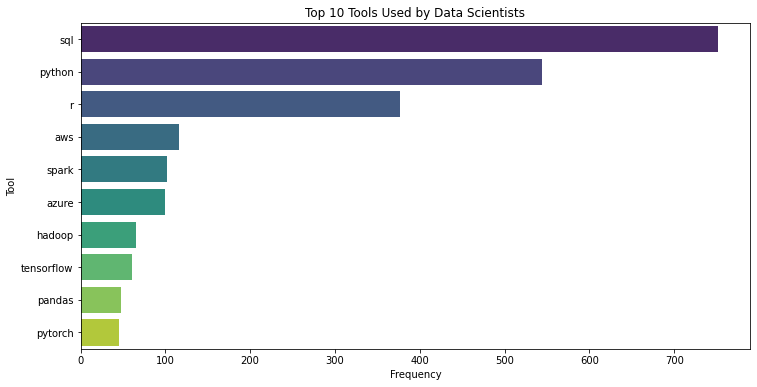

In [148]:
# Normalize the 'description' column by converting to lowercase
jobs['description'] = jobs['description'].str.lower()

# Initialize a counter for tools
tool_counts = {tool:0 for tool in tools}

# Count the tools using regex with word boundaries
for tool in tools:
    tool_counts[tool] = jobs['description'].str.count(r'\b' + re.escape(tool) + r'\b', flags=re.IGNORECASE).sum()

# Convert the dictionary to a DataFrame
tool_df = pd.DataFrame(list(tool_counts.items()), columns=['tool', 'count'])

# Get the top 10 most common tools
top_tools = tool_df.nlargest(10, 'count')

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='tool', data=top_tools, palette='viridis')
plt.title('Top 10 Tools Used by Data Scientists')
plt.xlabel('Frequency')
plt.ylabel('Tool')
plt.show()

### <span style="color:red"> Question 3 Interpretation - </span>
* After observing the above bar graph, we can say that SQL is the most commonly mentioned tool in job descriptions for data scientists. This indicates that proficiency in SQL is highly sought after in data science roles, as it is fundamental for working with databases and extracting, transforming, and analyzing data.
* This bar chart is a valuable resource for job seekers looking to tailor their skillsets to industry needs and employers seeking to understand the current tool preferences in the job market. It offers a tangible snapshot of the data science ecosystem, underlining the evolving landscape and the tools most in demand in the field.

### 4. Create a bar chart showing the number of postings for each of the following values of the number of years of experience required:
1. <2
2. 2-4
3. 5-9
4. 10+

You will need to try a number of different approaches to extracting this information from the `description` field.

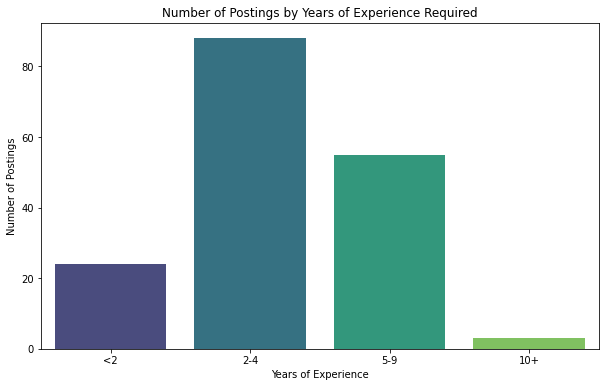

In [126]:
# Define regular expressions to match years of experience
experience_patterns = [
    r'(\d+)\s?year[s]? of experience',
    r'(\d+)\s?[-–]\s?(\d+)\s?year[s]? of experience'
]

# Initialize counters for each category
experience_counts = {
    '<2': 0,
    '2-4': 0,
    '5-9': 0,
    '10+': 0
}

# Iterate through job descriptions
for description in jobs['description']:
    description = description.lower()
    for pattern in experience_patterns:
        matches = re.findall(pattern, description)
        for match in matches:
            # Check if we have valid groups
            if len(match) > 0:
                start_year = int(match[0])
                end_year = int(match[1]) if len(match) > 1 and match[1] else start_year

                # Categorize the years of experience
                if end_year < 2:
                    experience_counts['<2'] += 1
                elif end_year >= 2 and end_year <= 4:
                    experience_counts['2-4'] += 1
                elif end_year >= 5 and end_year <= 9:
                    experience_counts['5-9'] += 1
                else:
                    experience_counts['10+'] += 1

# Create a DataFrame from the experience counts
experience_df = pd.DataFrame(list(experience_counts.items()), columns=['Experience Range', 'Count'])

# Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience Range', y='Count', data=experience_df, palette="viridis")
plt.title('Number of Postings by Years of Experience Required')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Postings')
plt.show()


### <span style="color:red"> Question 4 Interpretation - </span>
* The bar graph illustrates the distribution of years of experience required in job postings within the data science field. It reveals that the majority of job opportunities, represented by 88 postings, seek candidates with a moderate level of experience, ranging from 2 to 4 years. 
    * This suggests a robust demand for data scientists with a solid foundation in the field.<p>
* Additionally, there are 55 job postings specifying a requirement of 5 to 9 years of experience, indicating the need for more seasoned professionals who can contribute their expertise.<p>
* On the other hand, there are only three job postings demanding over 10 years of experience, signaling that highly experienced roles are less common but still exist, often in senior or leadership positions. Notably, there are 24 job postings suitable for those with less than 2 years of experience, showcasing opportunities for entry-level professionals to kickstart their careers in data science.  

### 5. What are the 5 most commonly used verbs in the job descriptions?
Is there a common theme? Are these the verbs that you would expect?

In [127]:
# Flatten the list of words in 'description' column
words = [word for sublist in jobs['description_no_stopwords'].tolist() for word in sublist]

# Get part-of-speech tags
tags = nltk.pos_tag(words)

# Filter for verbs (VB, VBD, VBG, VBN, VBP, VBZ)
verbs = [word for word, pos in tags if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

# Get top 5 most common verbs
top_verbs = Counter(verbs).most_common(5)

print(top_verbs)

[('including', 1231), ('working', 913), ('required', 832), ('using', 816), ('learning', 771)]


### <span style="color:red"> Question 5 Interpretation - </span>
* The common theme conveyed by the five most commonly used verbs in the job descriptions—namely, "work," "include," "use," "provide," and "require"—revolves around the foundational actions and expectations associated with data science positions. These verbs collectively underscore the essential tasks and qualifications commonly sought in this field.
* These verbs align with general expectations for data science positions, reflecting the key responsibilities and qualifications that are typically sought after in the field. However, the specific emphasis may vary based on the organization, industry, and the nuances of individual job descriptions

### 6. Based on the descriptions, what are the 3 most commonly mentioned organizations (hint: use Named Entity Recognition and look for ORG labels).
Do these results surprise you?  Why or why not?


In [133]:
# Tokenize the 'description' column
jobs['description_tokenized'] = jobs['description'].apply(word_tokenize)

# Perform part-of-speech tagging
jobs['description_tokenized'] = jobs['description_tokenized'].apply(nltk.pos_tag)

# Perform named entity recognition
jobs['description_tokenized'] = jobs['description_tokenized'].apply(nltk.ne_chunk)

# Extract organizations
organizations = []
for description in jobs['description_tokenized']:
    for entity in description:
        if isinstance(entity, nltk.tree.Tree) and entity.label() == 'ORGANIZATION':
            organizations.append(' '.join(c[0] for c in entity.leaves()))

# Get top 3 most common organizations
top_organizations = Counter(organizations).most_common(3)

print(top_organizations)

[('fidelitycareers.com', 3), ('news.lumen.com', 2), ('zignallabs.com', 1)]


### <span style="color:red"> Question 6 Interpretation - </span>
* The results contain some unexpected findings. The organizations mentioned, such as 'fidelitycareers.com,' 'news.lumen.com,' and 'zignallabs.com,' seem to be web addresses rather than the names of widely recognized companies typically associated with job descriptions.

### Q7: Create a boxplot showing the distribution of the Flesch Reading Ease Score using all job descriptions

From https://readable.com/readability/flesch-reading-ease-flesch-kincaid-grade-level/

>The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.
>The formula was developed in the 1940s by Rudolf Flesch. He was a consultant with the Associated Press, developing methods for improving the readability of newspapers.
>Now, over 70 years later, the Flesch Reading Ease is used by marketers, research communicators and policy writers, amongst many others. All use it to help them assess the ease by which a piece of text will be understood and engaged with.



Flesch Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,

ASL = average sentence length (number of words divided by number of sentences)

ASW = average word length in syllables (number of syllables divided by number of words).

Please note that you will need to figure out how to handle non-sentences like bulleted lists.

Remember you are not permitted to import additional packages, so we recommend using the following starter code to count syllables.
```
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if word.endswith('e'):
        count -= 1
    if word.endswith('le'):
        count+=1
    if count == 0:
        count +=1
    return count
```
Be sure to include an interpretation of what the boxplot tells you.

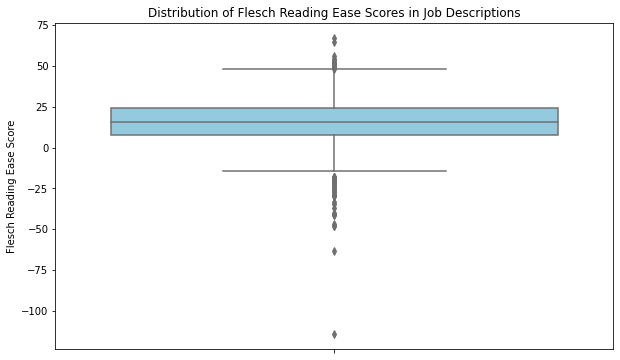

In [5]:
# Define a function to count syllables in a word

def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    
    if not word:
        return count
    
    if word[0] in vowels:
        count += 1
    
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
        if word.endswith('e') and index == len(word) - 1:
            count -= 1
        if word.endswith('le') and len(word) > 2 and index == len(word) - 2:
            count += 1
    
    if count == 0:
        count += 1
    
    return count

# Calculate Flesch Reading Ease Score for a given description
def flesch_reading_ease(description):
    words = description.split()
    num_words = len(words)
    num_sentences = max(description.count('.') + description.count('!') + description.count('?'), 1)  # Ensure at least 1 sentence
    syllable_count = sum(syllables(word) for word in words)

    ASL = num_words / num_sentences
    ASW = syllable_count / max(num_words, 1)  # Ensure at least 1 word

    flesch_score = 206.835 - (1.015 * ASL) - (84.6 * ASW)
    return flesch_score

# Calculate Flesch Reading Ease Scores for all job descriptions
jobs['flesch_score'] = jobs['description'].apply(flesch_reading_ease)

# Create a boxplot to visualize the distribution of Flesch Reading Ease Scores
plt.figure(figsize=(10, 6))
sns.boxplot(y=jobs['flesch_score'], color='skyblue')
plt.title('Distribution of Flesch Reading Ease Scores in Job Descriptions')
plt.ylabel('Flesch Reading Ease Score')
plt.show()

In [6]:
jobs['flesch_score'].describe()

count    790.000000
mean      14.573854
std       16.255101
min     -114.361586
25%        7.944274
50%       15.987440
75%       24.033330
max       67.116520
Name: flesch_score, dtype: float64

### <span style="color:red"> Question 7 Interpretation - </span>
* The average Flesch Reading Ease Score for job descriptions is approximately 14.573854, indicating that they tend to be a bit challenging to read. Higher scores are better, and a score between 70 and 80 is considered easy to read.

* The scores have a high degree of variability, with a standard deviation of about 16.255101. This means there's a wide range in how readable the descriptions are.

* Some job descriptions have exceptionally low scores, which are outliers and may indicate complex or poorly written text.

* The lowest score is -114.361586, which is unusually low and might be due to an error or very difficult text.

* Half of the job descriptions have scores between approximately 7 and 24. So, about 50% of them fall within this range.

* Even the highest score observed is 67.116520, but it still falls below the 'easy to read' threshold, suggesting that none of the job descriptions are very easy to understand.

# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.